# Algerian Forest Fires Dataset Project EDA Part

# 1.Understanding The Given Task

- Task Given By Instructor Krish Naik

- Solve in ipynb :

1.Import the dataset. https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

2.Do proper EDA(analysis) of you dataset and create a report

3.Then perform necessary preprocessing steps

# 2.Data Collection And Understanding 

- I used a dataset on ALGERIAN FOREST FIRES from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and Sidi Bel-Abbes region. The timeline of this dataset is from JUNE 2012 TO SEPTEMBER 2012. In this project, We focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.

- As per the Task given i choose regression problem to predict fire weather index

# 3. Data Exploration 

- In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try togather as many insights from it

Below are task to be performed in EDA :

**1. Importing Libraries** 

**2. Data Cleaning for EDA Report** 

**3. Exploratory Data Analysis (EDA) on all features**

# 3.1 Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Create Dataframe and Read dataset
Forest_fire = pd.read_csv('Algerian_forest_fires_dataset_UPDATE11.csv', header=1)
Forest_fire.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
[features for features in Forest_fire.columns if Forest_fire[features].isnull().sum()>1]

['month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes  ']

In [5]:
Forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


- Looks like all the features are identified as object but can be coverted into numeric,if we remove rows which has strings.

# 3.2 Data Cleaning

In [6]:
Forest_fire[Forest_fire.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


- Remove 122 column Because of it is null

In [8]:
Forest_fire= Forest_fire.drop(122).reset_index(drop=True)

In [9]:
Forest_fire[Forest_fire.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


- The dataset is converted into two sets based on Region from 122th index,we can make a new column based on the Region

 **1 : "Bejaia Region Dataset"**

 **2 : "Sidi-Bel Abbes Region Dataset"**

Add New column with region

In [11]:
Forest_fire.loc[:122, 'Region']=1
Forest_fire.loc[122:, 'Region']=2
Forest_fire[['Region']] = Forest_fire[['Region']].astype(int)

In [12]:
Forest_fire.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [13]:
Forest_fire = Forest_fire.dropna().reset_index(drop=True)
Forest_fire.shape

(244, 15)

In [14]:
Forest_fire.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


**Null and other unwanted rows are removed**

In [15]:
Forest_fire= Forest_fire.drop(122).reset_index(drop=True)

**Some column names were misspaced so we can fix it**

In [16]:
Forest_fire.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

- Looks like the value were misspaced so we can use str.strip() method

In [17]:
Forest_fire.columns = Forest_fire.columns.str.strip()
Forest_fire.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

**Changing the required columns as integer data type**

In [18]:
Forest_fire[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = Forest_fire[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

**Changing the other columns to Float data type**

In [19]:
objects = [features for features in Forest_fire.columns if Forest_fire[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        Forest_fire[i] = Forest_fire[i].astype(float)

In [20]:
#Final Datatypes check
Forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [21]:
Forest_fire.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


**Data Cleaning in target variable**

In [22]:
Forest_fire.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

- Looks like the value were misspaced so we can use str.strip() method

In [23]:
Forest_fire.Classes = Forest_fire.Classes.str.strip()

In [24]:
Forest_fire.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

# Region 1 (Bejaia Region)

In [25]:
Forest_fire[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


# Region 2 (Sidi-Bel Abbes Region)

In [26]:
Forest_fire[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [28]:
Forest_fire.to_csv('Algerian_forest_fires_dataset_UPDATE11.csv', index = False)

## 3.3 Exploratory Data Analysis (EDA)

In [29]:
#Droping Year Features
Forest_fire_1 = Forest_fire.drop(['day' , 'month' , 'year'] , axis=1)

In [30]:
Forest_fire_1['Classes'] = np.where(Forest_fire_1['Classes'] == 'not fire',0,1)

In [31]:
Forest_fire_1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

### Visualization of Distribution

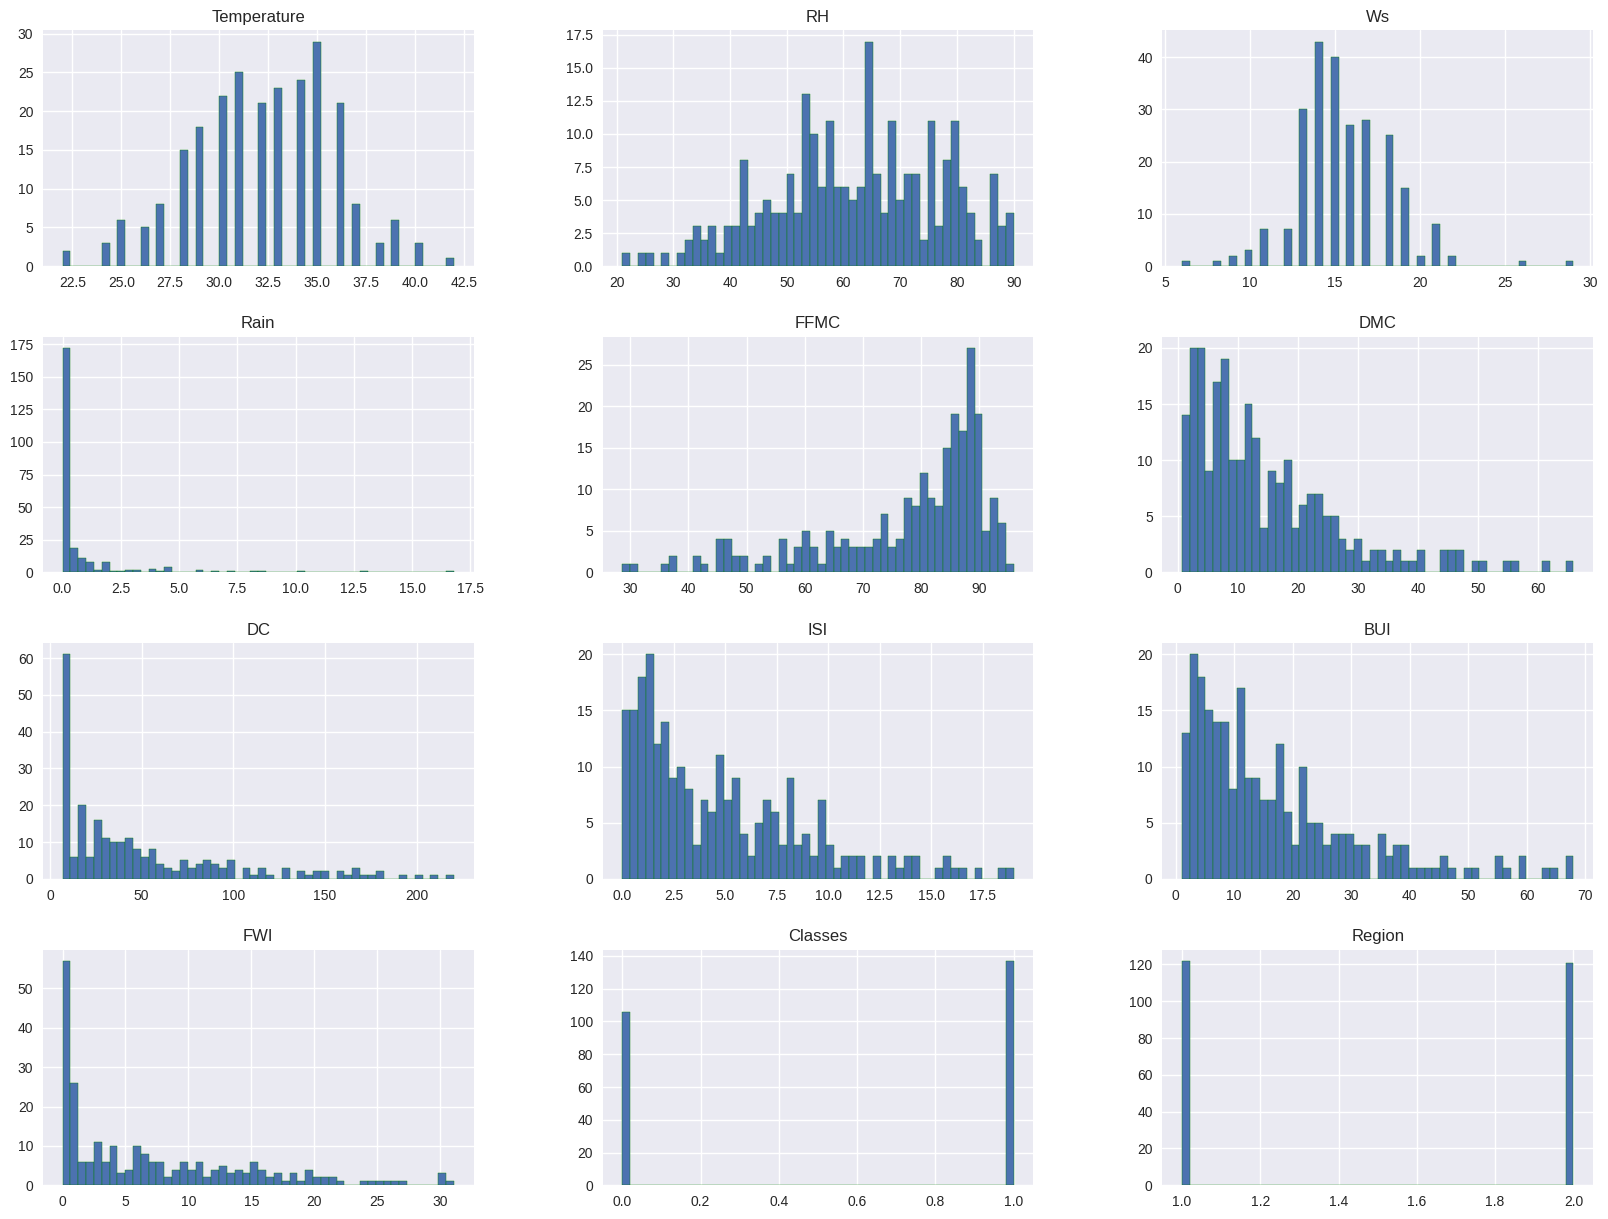

In [33]:
#Plot density plot for all features

plt.style.use('seaborn')
Forest_fire_1.hist(bins=50, figsize=(20,15), ec = 'g')
plt.show()

In [34]:
# Percentage For PieChart
percentage = Forest_fire_1.Classes.value_counts(normalize = True) * 100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

### Charts

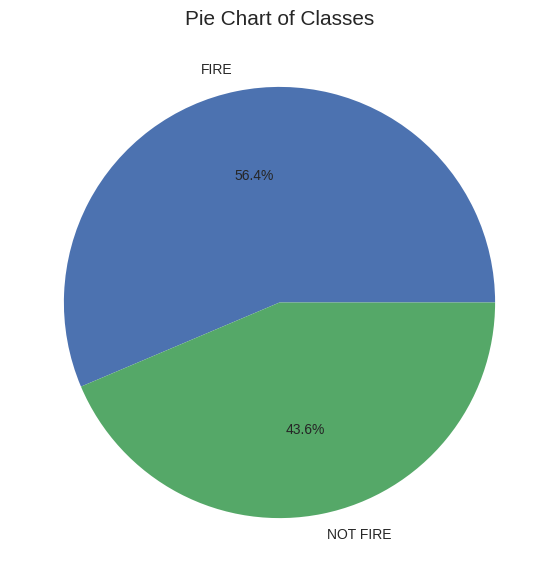

In [35]:
#Plottng PieChart

classeslabels = ['FIRE', 'NOT FIRE']
plt.figure(figsize=(12, 7))
plt.pie(percentage, labels = classeslabels, autopct = '%1.1f%%')
plt.title ('Pie Chart of Classes', fontsize=15)
plt.show()

#### Canadian Forest Fire Weather Index (FWI) System

This column can be considered for Regression problem

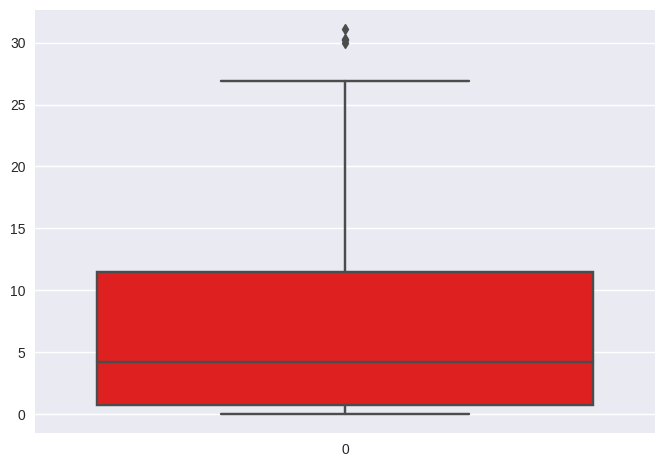

In [46]:
#Boxplot
ax = sns.boxplot(Forest_fire['FWI'], color= 'red')

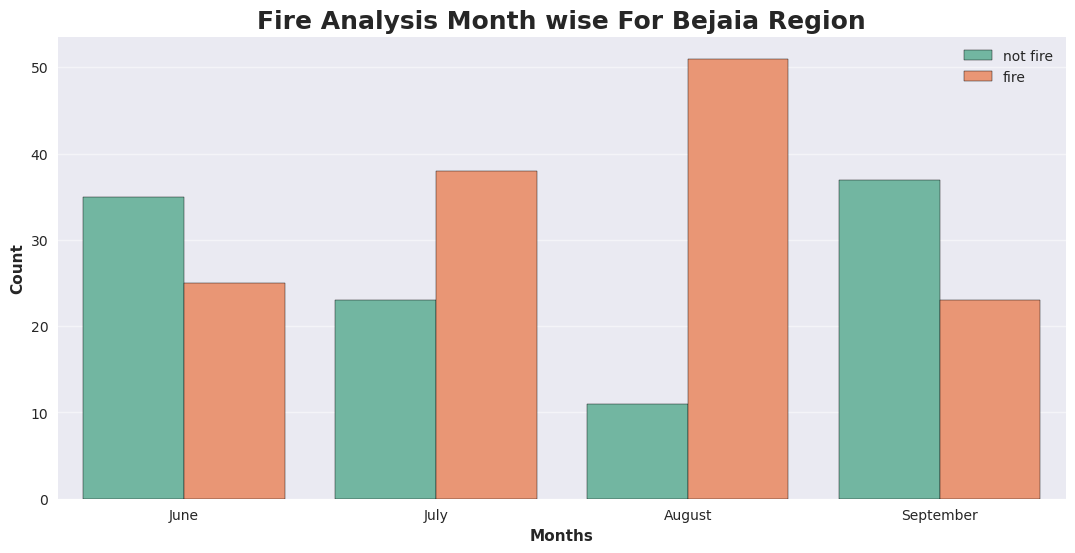

In [48]:
dftemp = Forest_fire.loc[Forest_fire['Region'] == 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data = Forest_fire, ec= 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise For Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight = 'bold')
plt.legend(loc= 'upper right')
plt.xticks(np.arange(4),['June', 'July' , 'August', 'September',])
plt.grid(alpha= 0.5, axis = 'y')
plt.show()

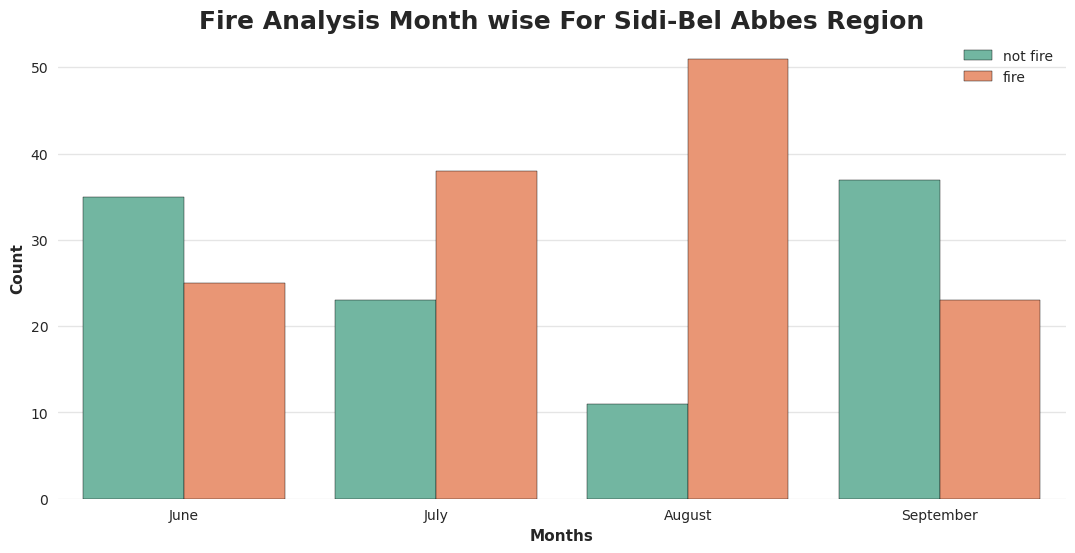

In [49]:
dftemp = Forest_fire.loc[Forest_fire['Region'] == 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data = Forest_fire, ec= 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise For Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight = 'bold')
plt.legend(loc= 'upper right')
plt.xticks(np.arange(4),['June', 'July' , 'August', 'September',])
plt.grid(alpha= 0.5, axis = 'y')
plt.show()

* Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

* Most of the fires happened in August and very high Fires happened in only 3 months - **June, July and August.**

* Less Fires was on September

# 3.4 Exploratory Data Analysis (EDA) on all Features

In [50]:
Forest_fire.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [53]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  Forest_fire_1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

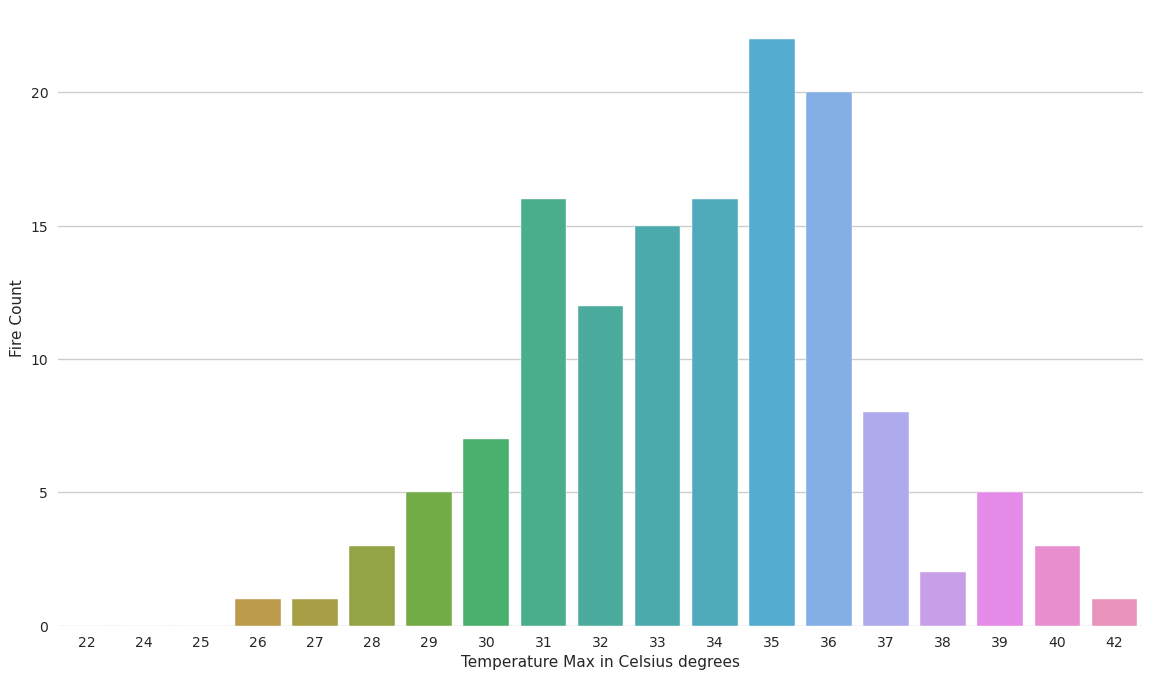

In [54]:
barchart('Temperature', 'Temperature Max in Celsius degrees')

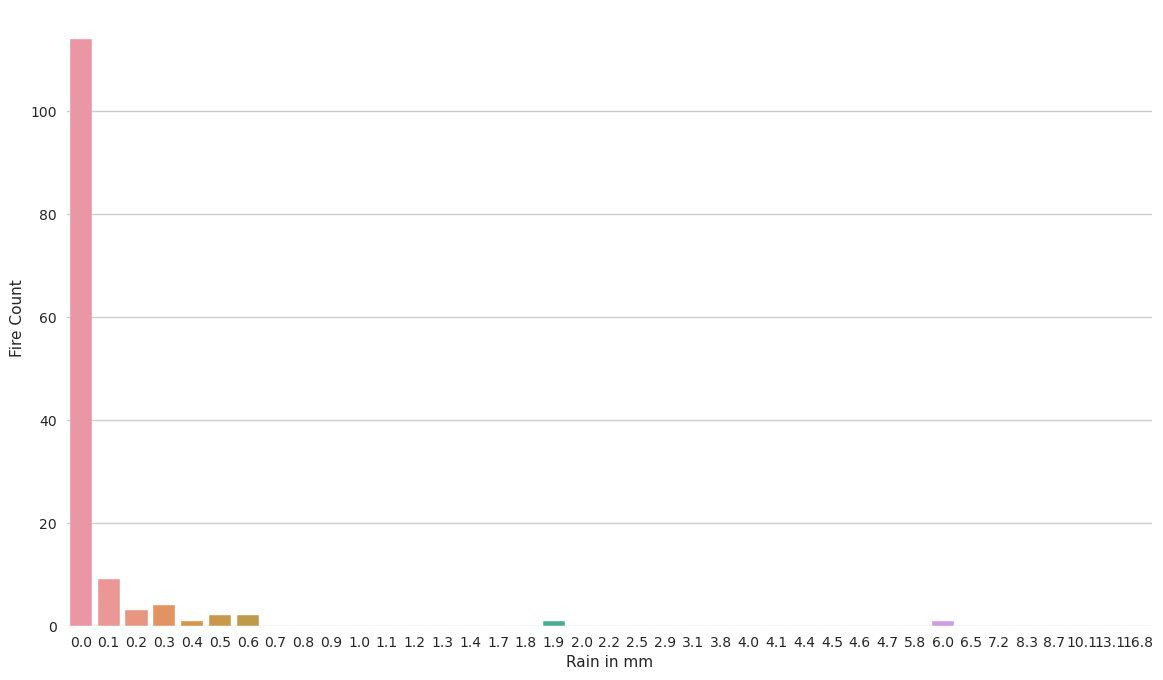

In [55]:
barchart('Rain' , 'Rain in mm')

## Fine Fuel Moisture Code (FFMC) index

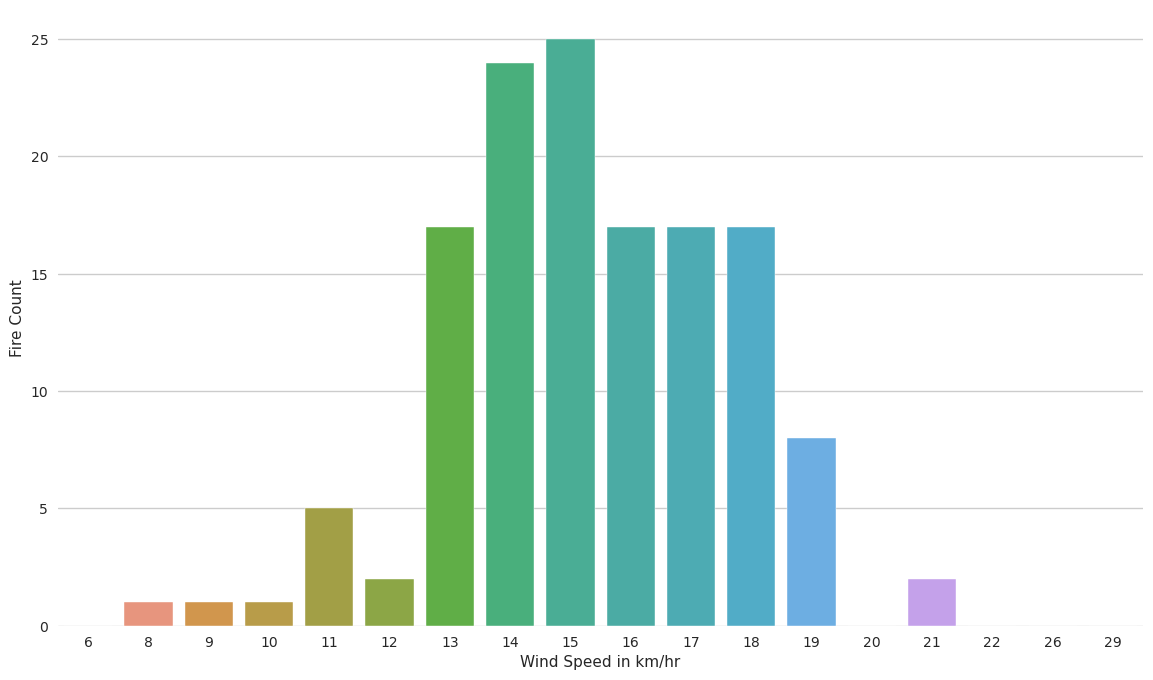

In [57]:
barchart('Ws', 'Wind Speed in km/hr')

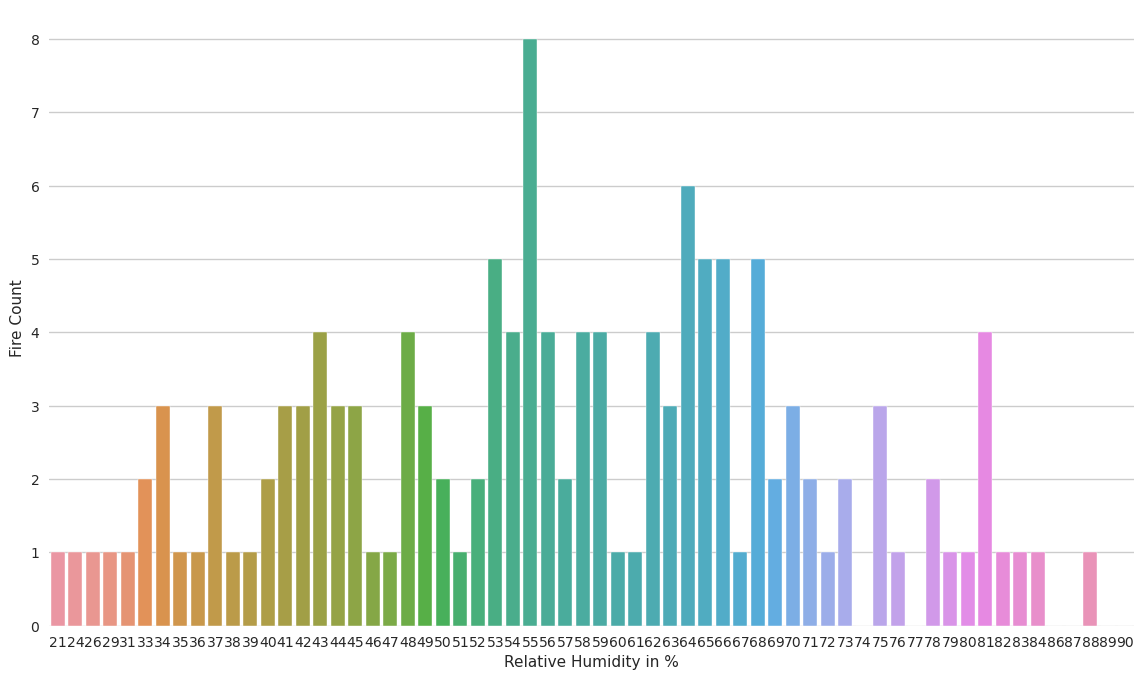

In [58]:
barchart('RH', 'Relative Humidity in %')

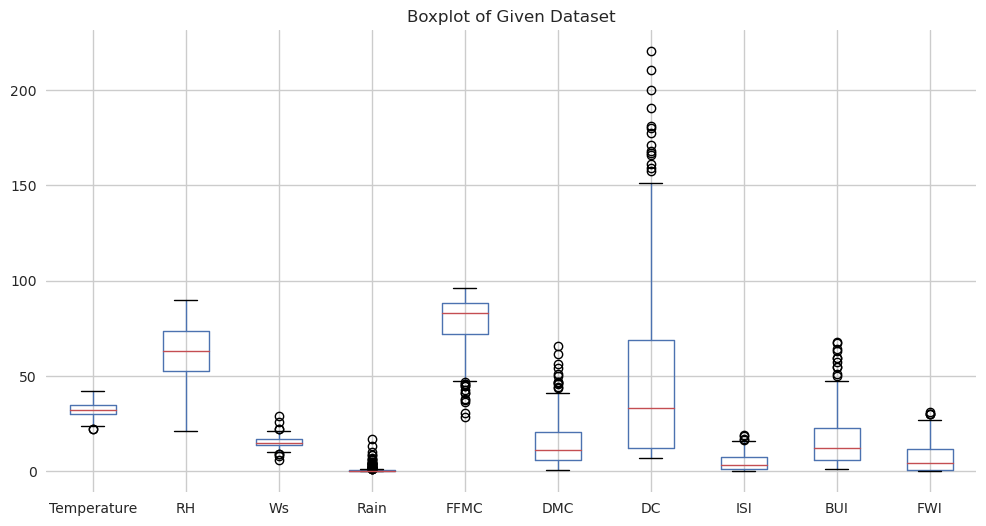

In [60]:
dftemp = Forest_fire_1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize=(12, 6))
ax = dftemp.boxplot()
ax.set_title('Boxplot of Given Dataset')
plt.show()

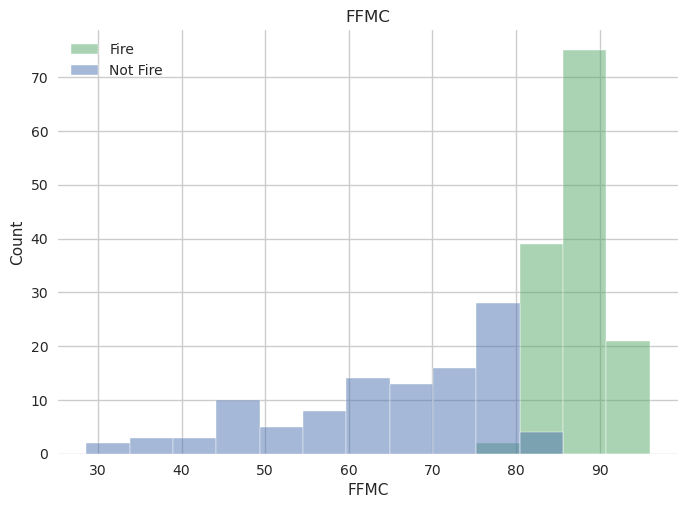

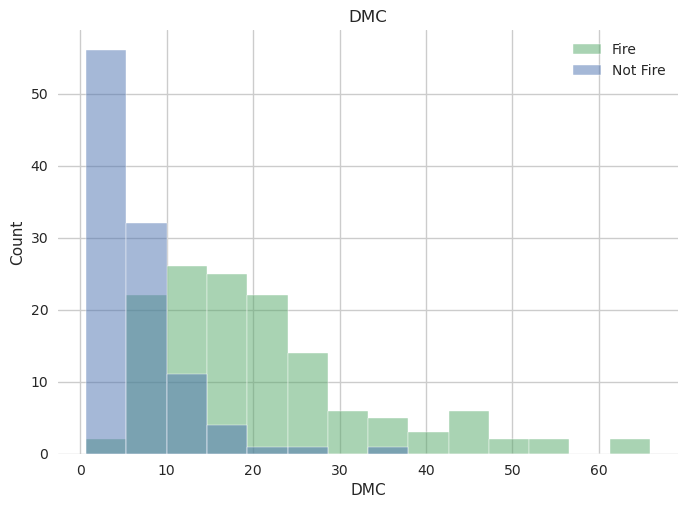

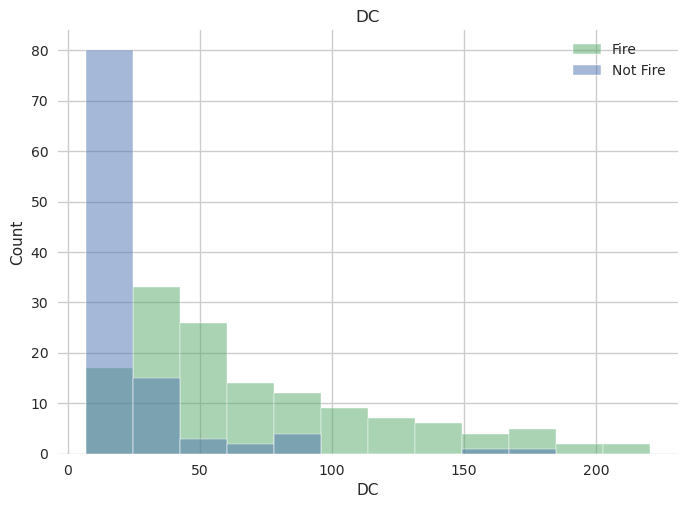

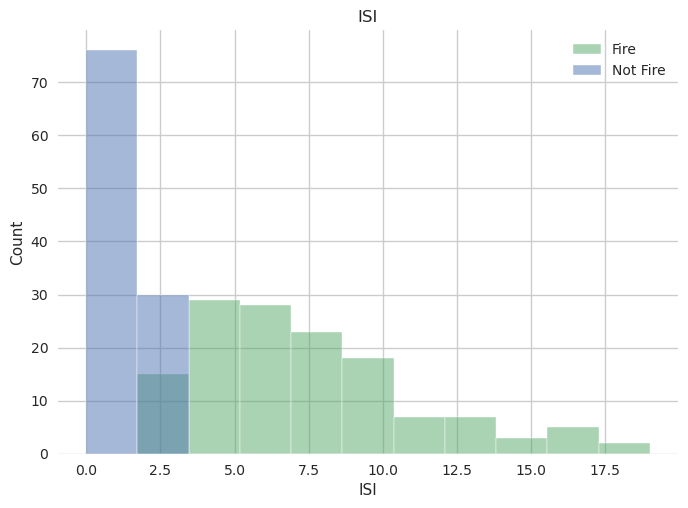

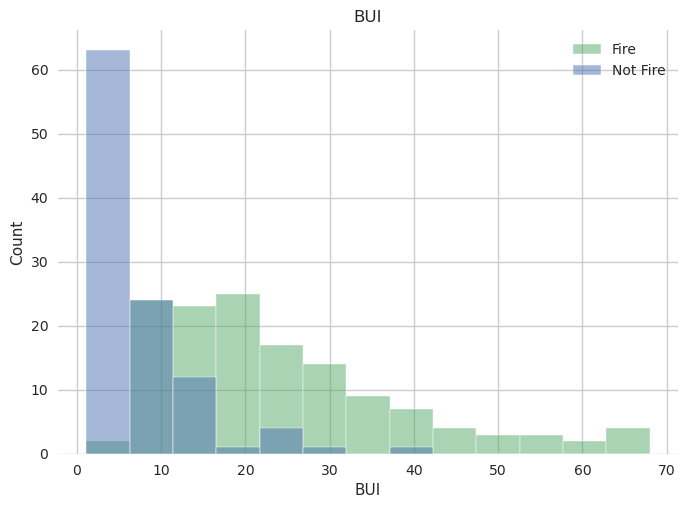

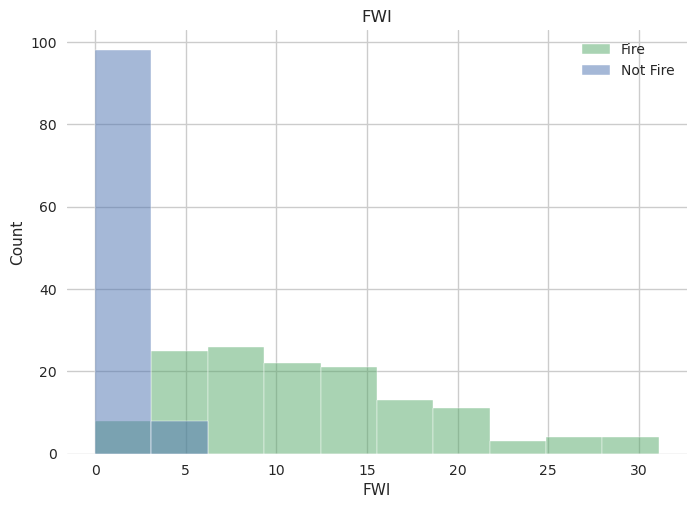

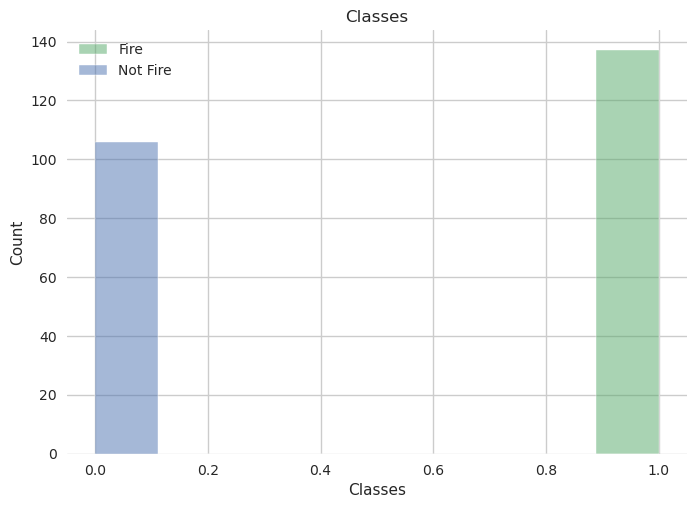

In [63]:
dftemp = dftemp = Forest_fire_1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

### REPORT
#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**


#### FWI System Components Report
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*,
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*,
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*,
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*,
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*,
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*,
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.